In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Study of the Wiener Process

In [2]:
def simulate_wiener_process(T:float=1, N:int=1_000)->np.ndarray:
    """
    Simulates a standard Wiener process (Brownian Motion).
    """
    dt = T / N
    t = np.linspace(0, T, N)

    dW = np.sqrt(dt) * np.random.normal(size=N)
#     dW = np.random.normal(mu*dt, sigma*np.sqrt(dt), N)

    W = np.cumsum(dW)
    # Prepend the initial value W(0) = 0
    W = np.insert(W, 0, 0)
    return t, W[:-1] # After insert 0 as first element array length is N+1


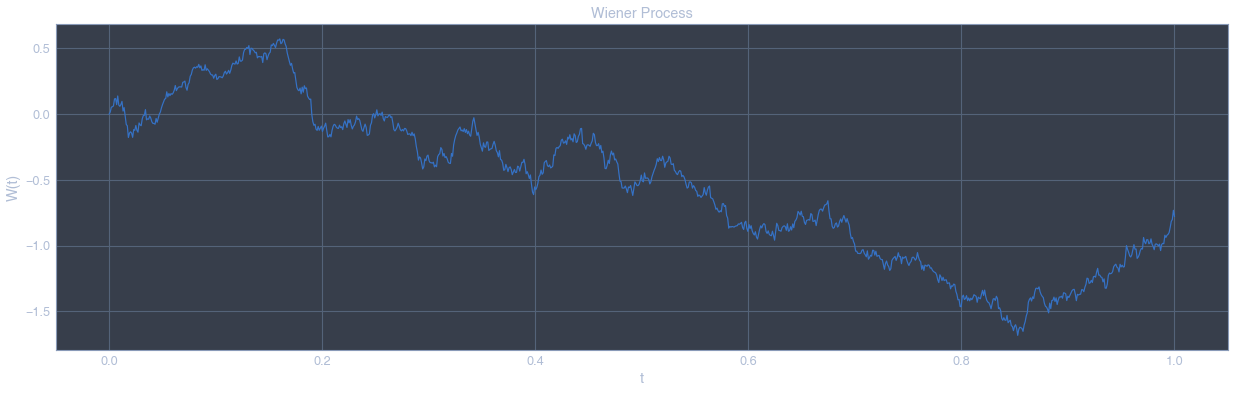

In [44]:
t, W = simulate_wiener_process()

plt.figure(figsize=(21, 6))
plt.plot(t, W)
plt.title('Wiener Process')
plt.xlabel('t')
plt.ylabel('W(t)');

## Means and STDs

In [13]:
means = []
stds = []
for _ in range(1_000):
    t, W = simulate_wiener_process()
    means.append(np.mean(W))
    stds.append(np.std(W))
    
np.mean(means), np.std(stds)

(0.03491672267143795, 0.15009699201974794)

Text(0.5, 1.0, 'STDs distribution')

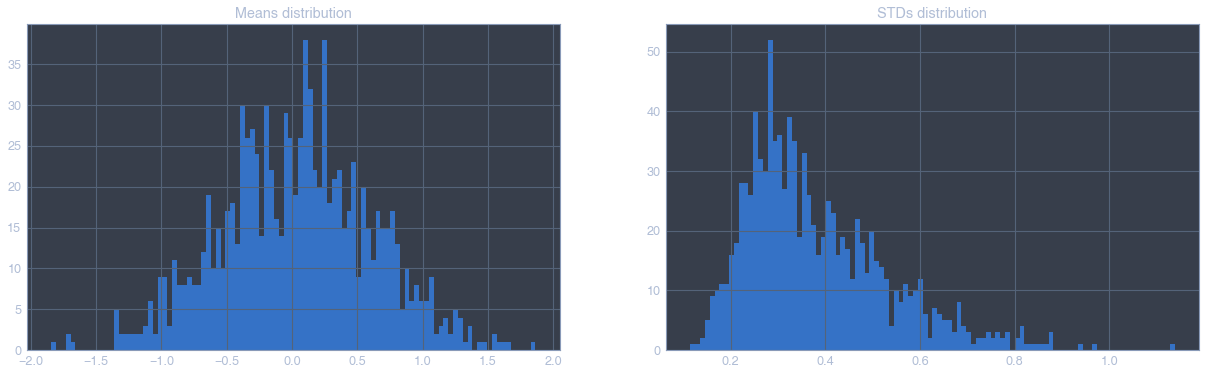

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(21, 6))
ax[0].hist(means, bins=100)
ax[0].set_title('Means distribution')
ax[1].hist(stds, bins=100)
ax[1].set_title('STDs distribution')

## Independence of Increments

p-value: 0.768


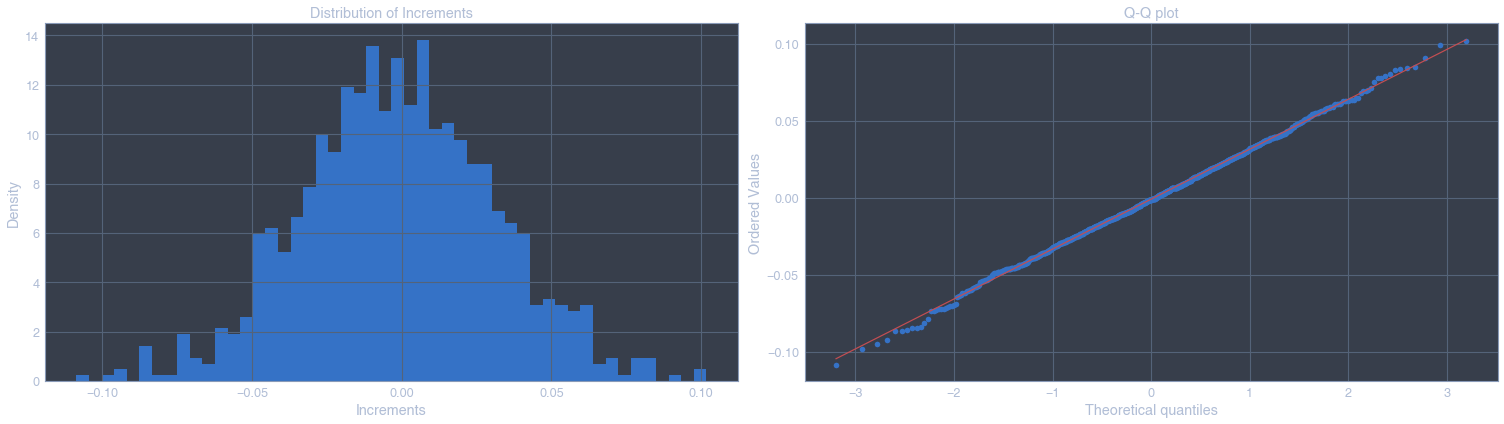

In [10]:
t, W = simulate_wiener_process()
increments = np.diff(W)

k2, p_value = stats.normaltest(increments)
print(f'p-value: {p_value:.3f}')

fig, ax = plt.subplots(1, 2, figsize=(21, 6))
ax[0].hist(increments, bins=50, density=True)
ax[0].set_title('Distribution of Increments')
ax[0].set_xlabel('Increments')
ax[0].set_ylabel('Density')

stats.probplot(increments, dist='norm', plot=ax[1])
ax[1].set_title('Q-Q plot')

fig.tight_layout()

Text(0.5, 1.0, 'P-values distribution')

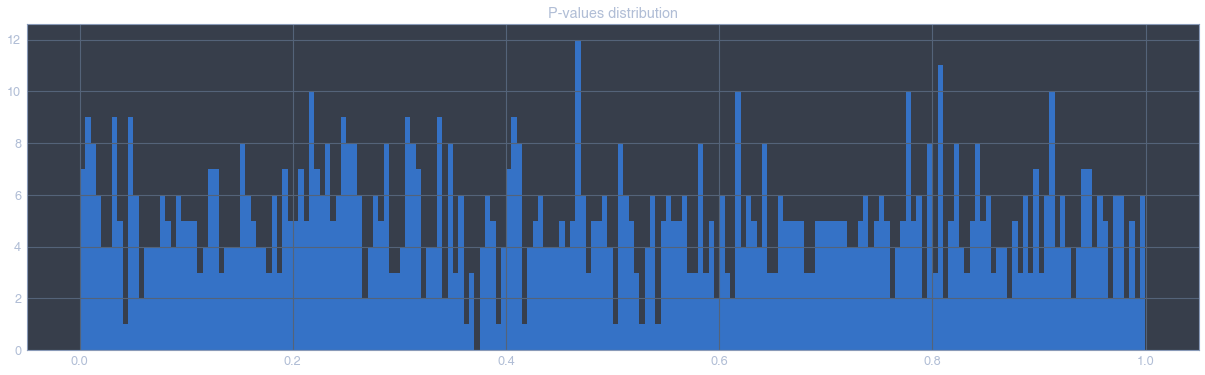

In [15]:
p_vals = []
for _ in range(1_000):
    t, W = simulate_wiener_process()
    increments = np.diff(W)
    _, p_value = stats.normaltest(increments)
    p_vals.append(p_value)

plt.figure(figsize=(21, 6))
plt.hist(p_vals, bins=200)
plt.title('P-values distribution')

## the Variance is Proportional to Time

Time t=0.1: emp. variance=0.1045, theor. variance=0.1000
Time t=0.5: emp. variance=0.5040, theor. variance=0.5000
Time t=1.0: emp. variance=0.9562, theor. variance=1.0000
Time t=2.0: emp. variance=2.0617, theor. variance=2.0000


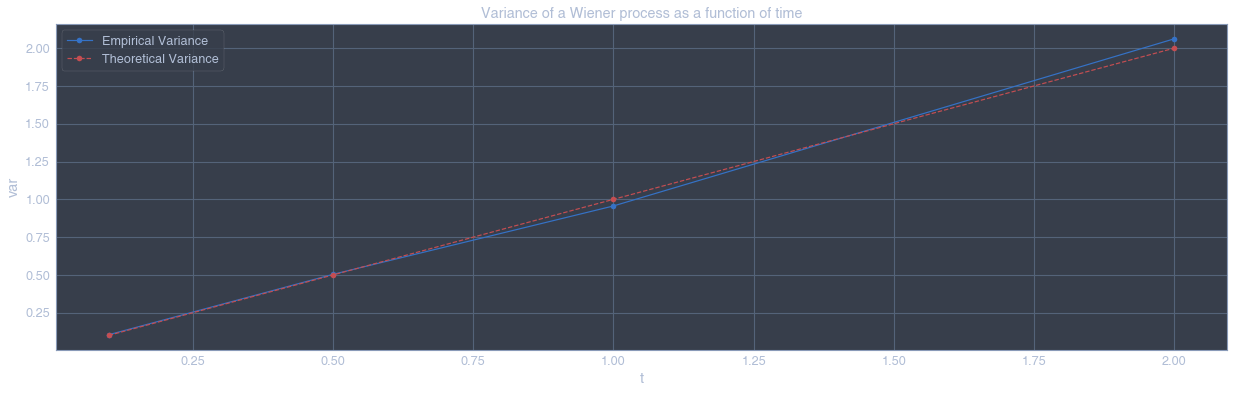

In [3]:
time_points = [0.1, 0.5, 1.0, 2.0]
num_simulations = 1_000

variances = []
theoretical_variances = []
for t in time_points:
    values_at_t = []
    for _ in range(num_simulations):
        N = int(t*1000)
        _, W = simulate_wiener_process(t, N)
        values_at_t.append(W[-1])

    empirical_variance = np.var(values_at_t)
    theoretical_variance = t

    variances.append(empirical_variance)
    theoretical_variances.append(theoretical_variance)

    print(f'Time t={t}: emp. variance={empirical_variance:.4f}, theor. variance={theoretical_variance:.4f}')

plt.figure(figsize=(21, 6))
plt.plot(time_points, variances, 'bo-', label='Empirical Variance')
plt.plot(time_points, theoretical_variances, 'ro--', label='Theoretical Variance')
plt.xlabel('t')
plt.ylabel('var')
plt.title('Variance of a Wiener process as a function of time')
plt.legend()


## Scalling

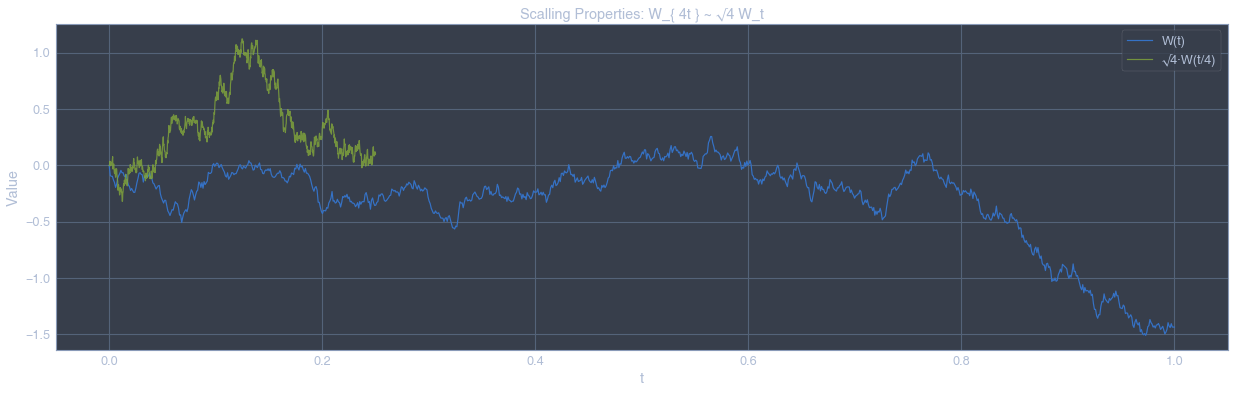

In [7]:
"""Демонстрация масштабирующего свойства: W_{at} ~ √a W_t"""
T = 1.0
N = 1000
a = 4

_, W_original = simulate_wiener_process(T, N)

t_scaled = np.linspace(0, T/a, N)
W_scaled = simulate_wiener_process(T/a, N)[1] * np.sqrt(a)

plt.figure(figsize=(21, 6))
plt.plot(np.linspace(0, T, N), W_original, label='W(t)')
plt.plot(t_scaled, W_scaled, label=f'√{a}·W(t/{a})', alpha=0.8)
plt.xlabel('t')
plt.ylabel('Value')
plt.title(f'Scalling Properties: W_{{ {a}t }} ~ √{a} W_t')
plt.legend()
